<a href="https://colab.research.google.com/github/ovieimara/MATPMDA/blob/master/MATPMDA_Portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Resting heart rate can be defined as the number of times the heart beats in one minute while at rest.

It may be used to indicate one's basic fitness level. Typically, if the resting heart rate goes down over time, that may reflect the effectiveness of steady aerobic exercise.

Heart rate can be affected by various factors such as temperature, body position, activities, emotions, and time of day.

For overall cardiovascular health in adults, the world health organisation recommends at least 150 minutes per week of moderate aerobic activity or 75 minutes per week of vigorous aerobic activity. Aerobic excercise includes activities that increase your breathing and heart rate such as walking, jogging, cycling and swimming.

One way to monitor the intensity of your activity is to check your heart rate against the estimated maximum heart rate for your age. During moderate intense activity, your heart rate beats about 50-69% of the maximum rate. During vigorous intense activity, the heartbeat can go up to 70-90% of your maximum heart rate

In this context our activity includes walking, and we are trying to investigate the amount of activity suitable to maintain a healthy heart rate as recommended by world health organisation.
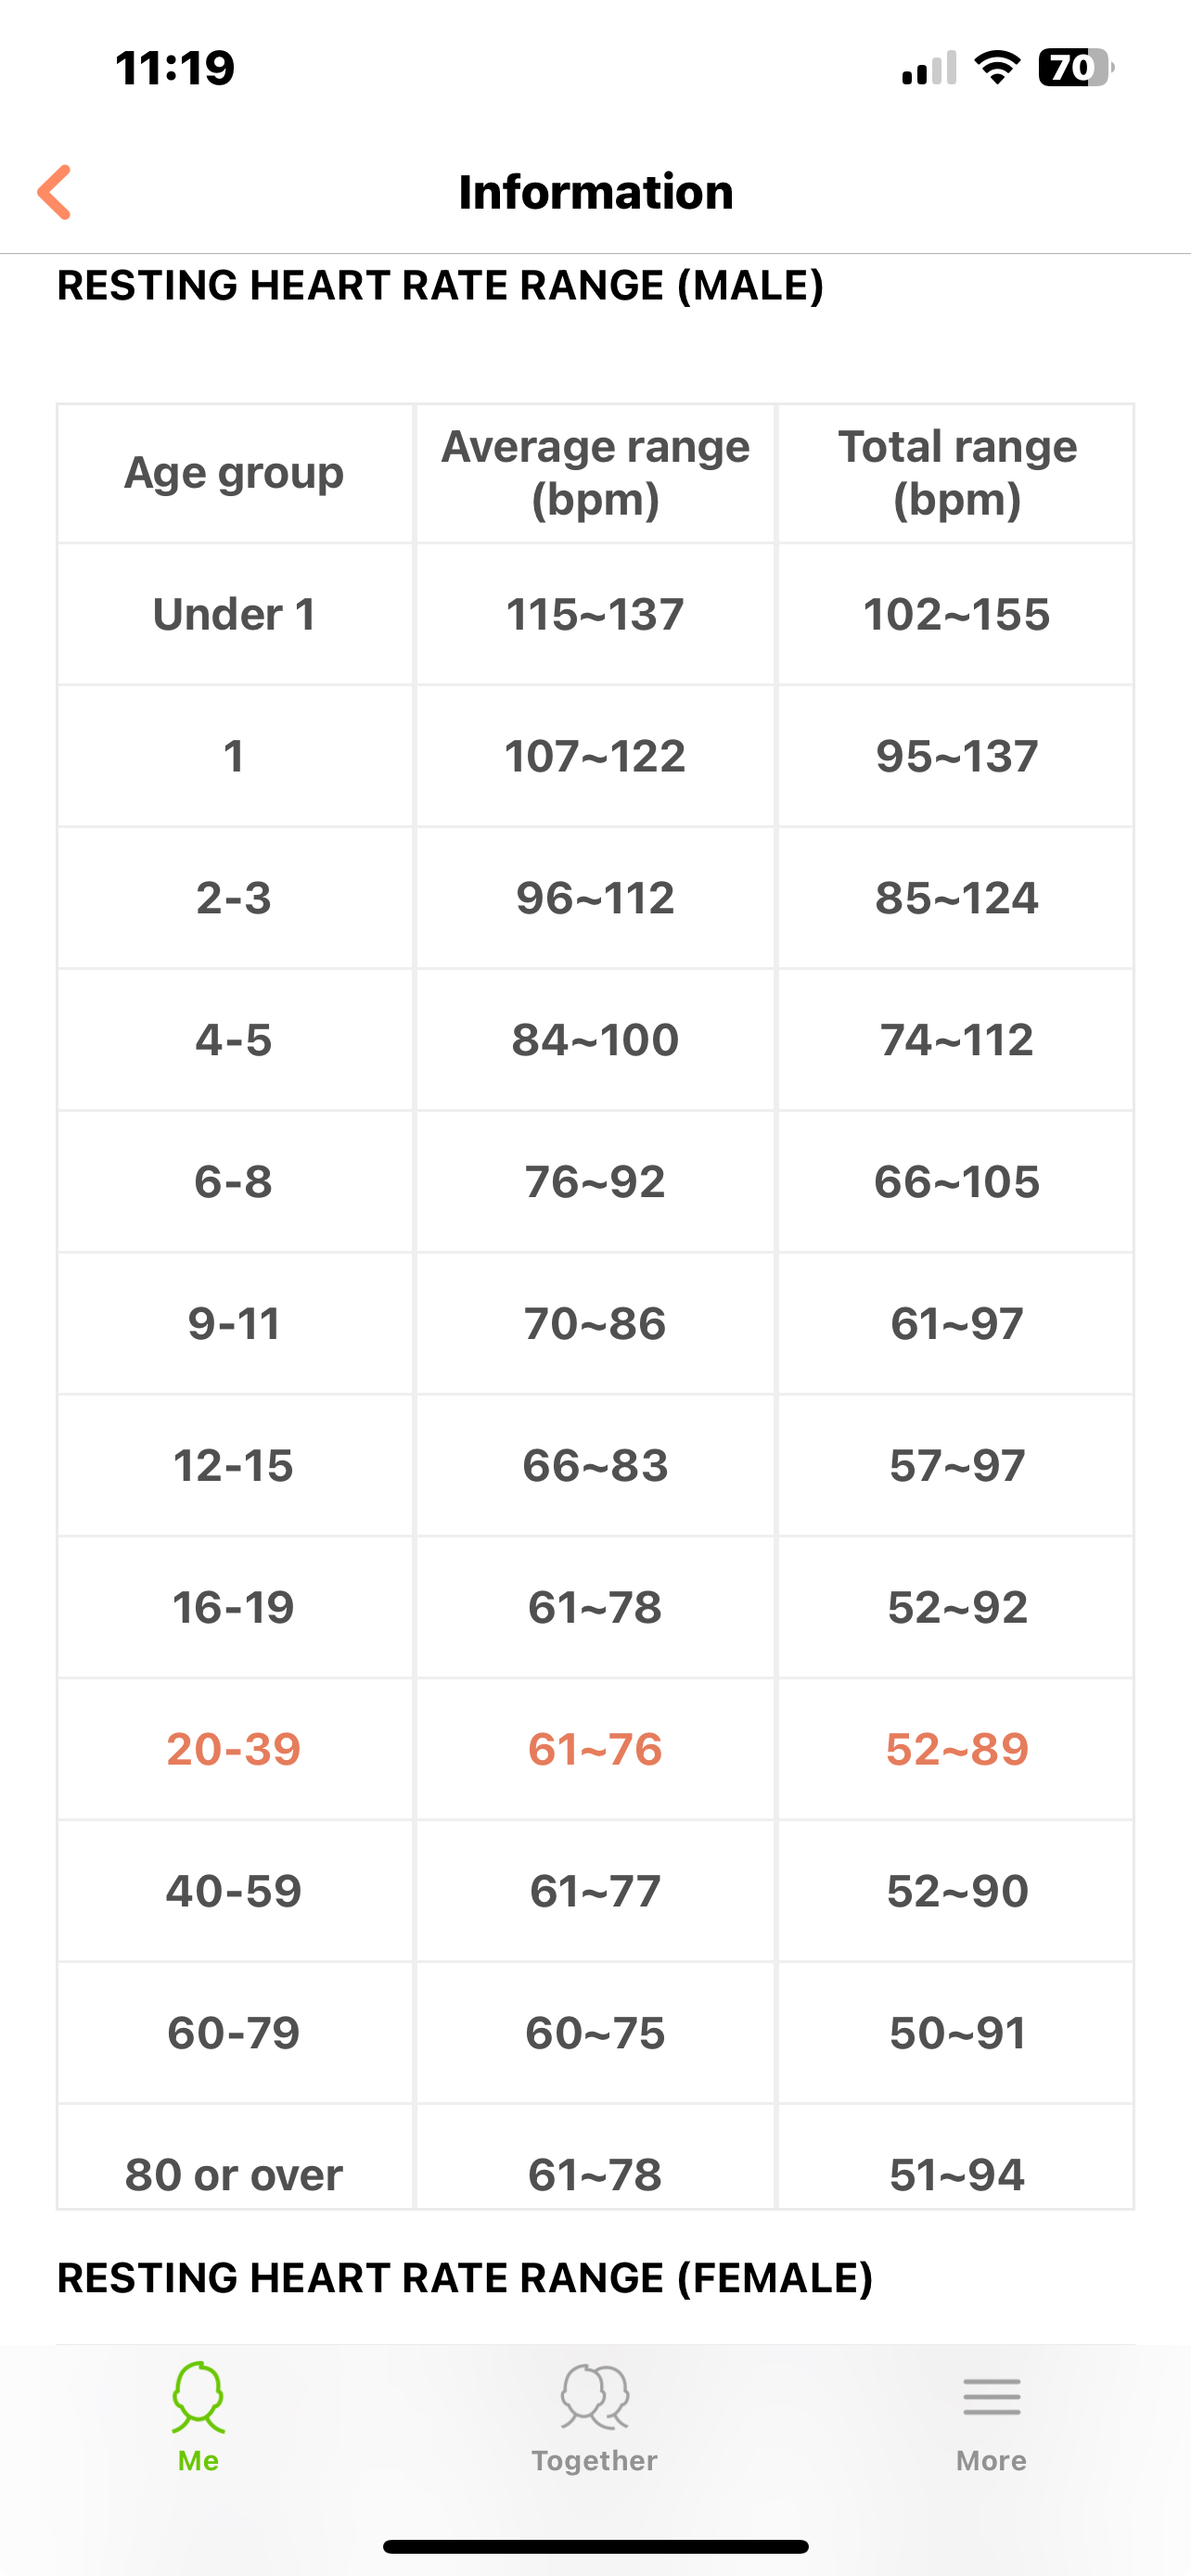

In [103]:
library(readr) # Load readr
file_path = "/content/fitness_activity_stats.csv"
# spec(my_data)
cols_to_read <- c("Duration", "Distance", "Calories", "Avg bpm", "Fit")

data <- read_csv(file = file_path, col_select = all_of(cols_to_read), col_types = cols(
  `Duration` = col_double(),
  `Distance` = col_double(),
  `Calories` = col_double(),
  `Avg bpm` = col_double(),
  Fit = col_character()
))

In [128]:
head(data)

Duration,Distance,Calories,Avg bpm,Fit
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
216,16.53,884,110,NO
213,13.32,697,110,NO
126,7.59,387,85,NO
23,8.33,437,89,NO
43,2.70,144,73,YES
126,7.57,388,77,YES


In [105]:
summary(data)

    Duration         Distance         Calories        Avg bpm      
 Min.   :  3.00   Min.   : 0.190   Min.   : 14.0   Min.   :  0.00  
 1st Qu.: 16.75   1st Qu.: 2.035   1st Qu.:104.2   1st Qu.: 74.00  
 Median : 91.00   Median : 6.340   Median :328.5   Median : 77.50  
 Mean   : 90.28   Mean   : 6.105   Mean   :319.0   Mean   : 77.03  
 3rd Qu.:135.50   3rd Qu.: 8.760   3rd Qu.:444.2   3rd Qu.: 82.25  
 Max.   :231.00   Max.   :16.530   Max.   :884.0   Max.   :110.00  
     Fit           
 Length:32         
 Class :character  
 Mode  :character  
                   
                   
                   

In [193]:
features <- colnames(data)
sub_data <- data[, c("Duration", "Distance", "Calories", "Avg bpm")]

sub_features = features[1:4]
size = length(sub_features)

print(sub_features)

[1] "Duration" "Distance" "Calories" "Avg bpm" 


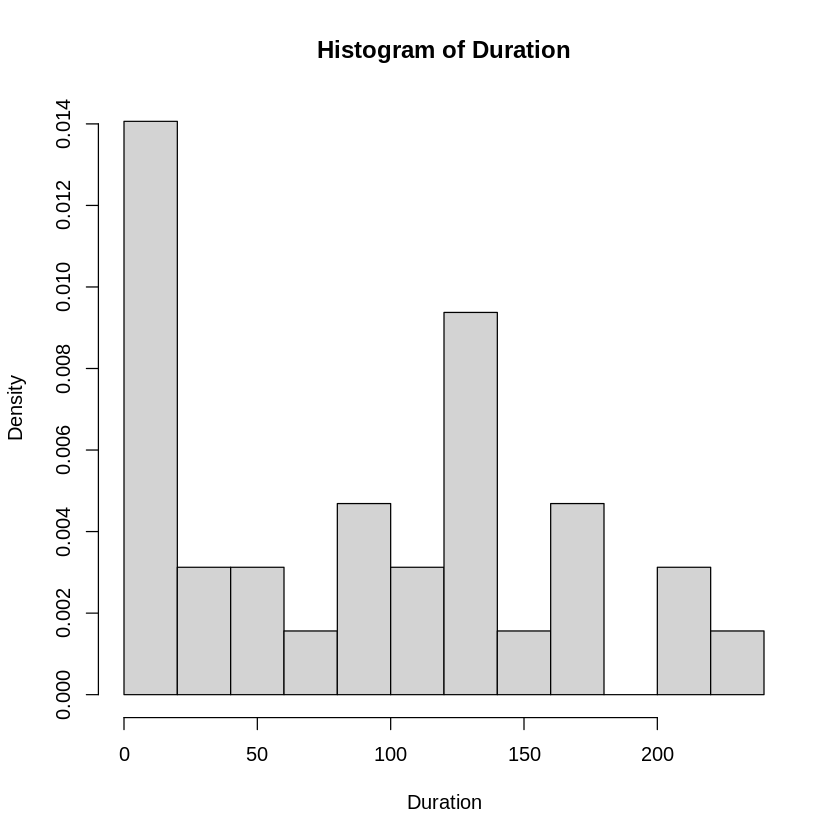

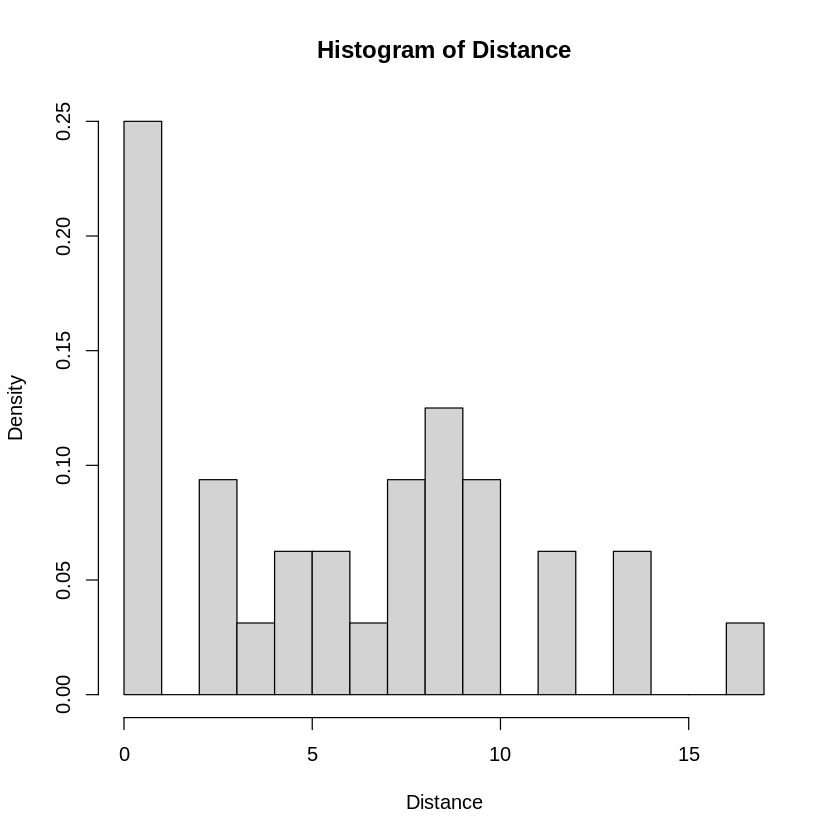

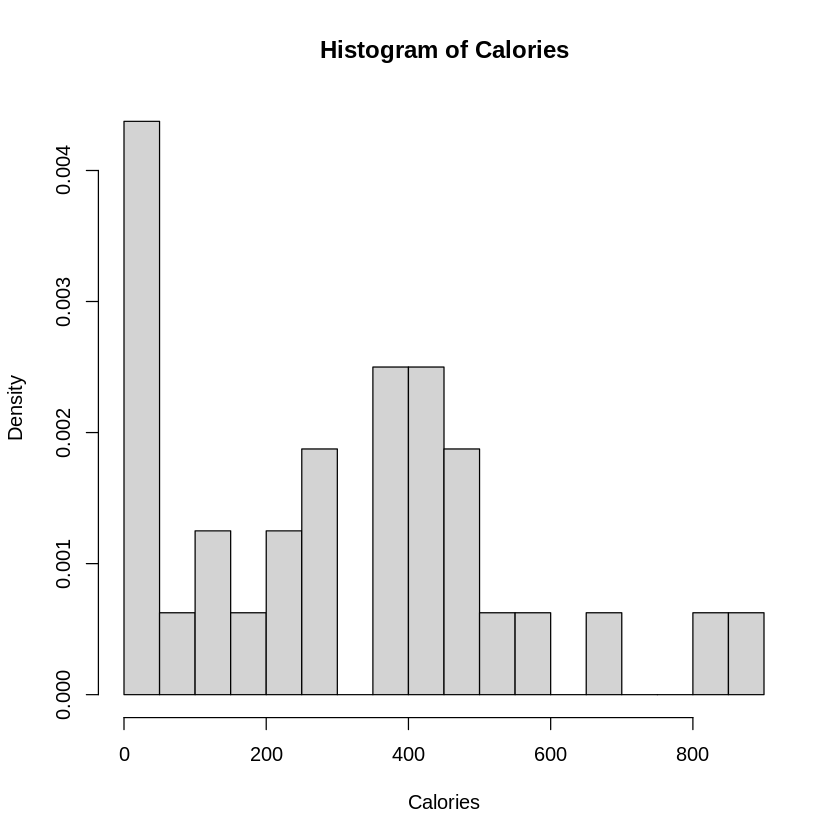

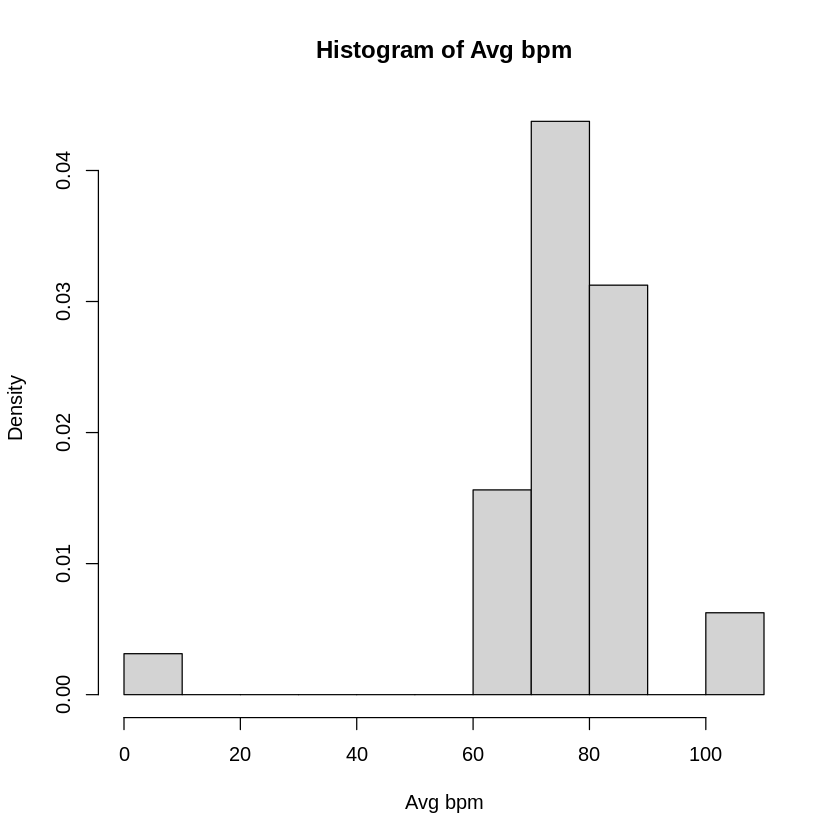

In [195]:

for (i in 1:size) {
  hist(sub_data[[sub_features[i]]], probability = TRUE, nclass = 14, main = paste("Histogram of", sub_features[i]),
           xlab = sub_features[i])
}

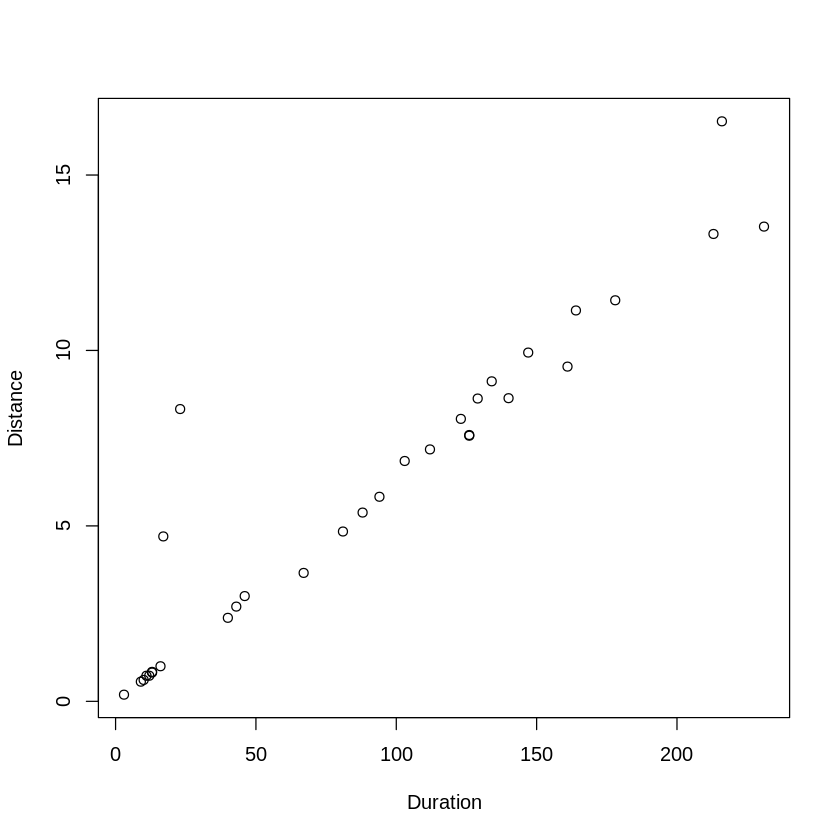

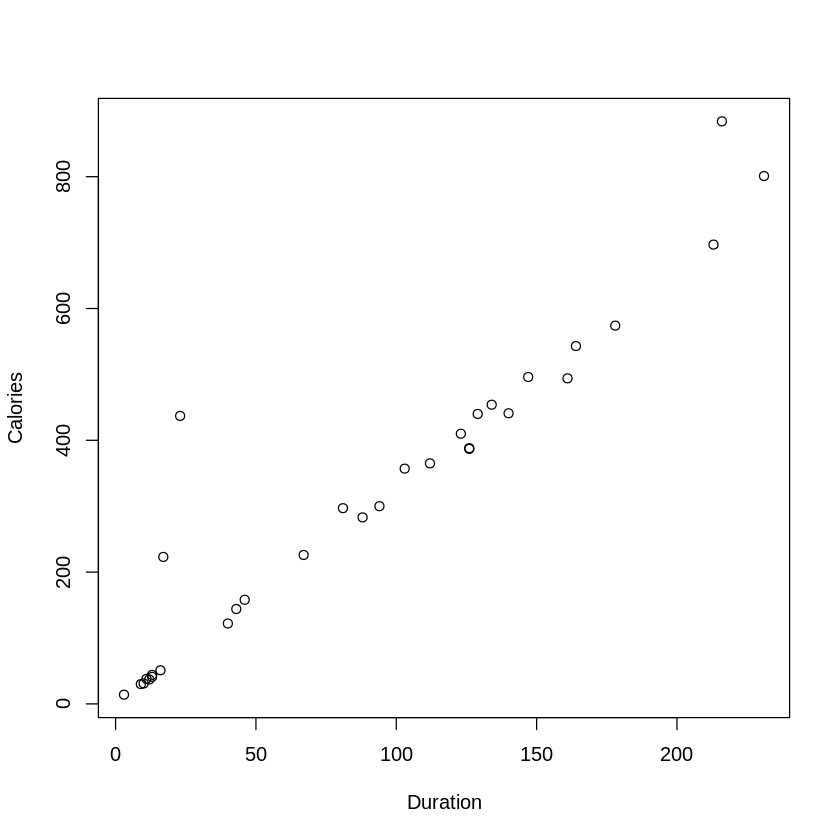

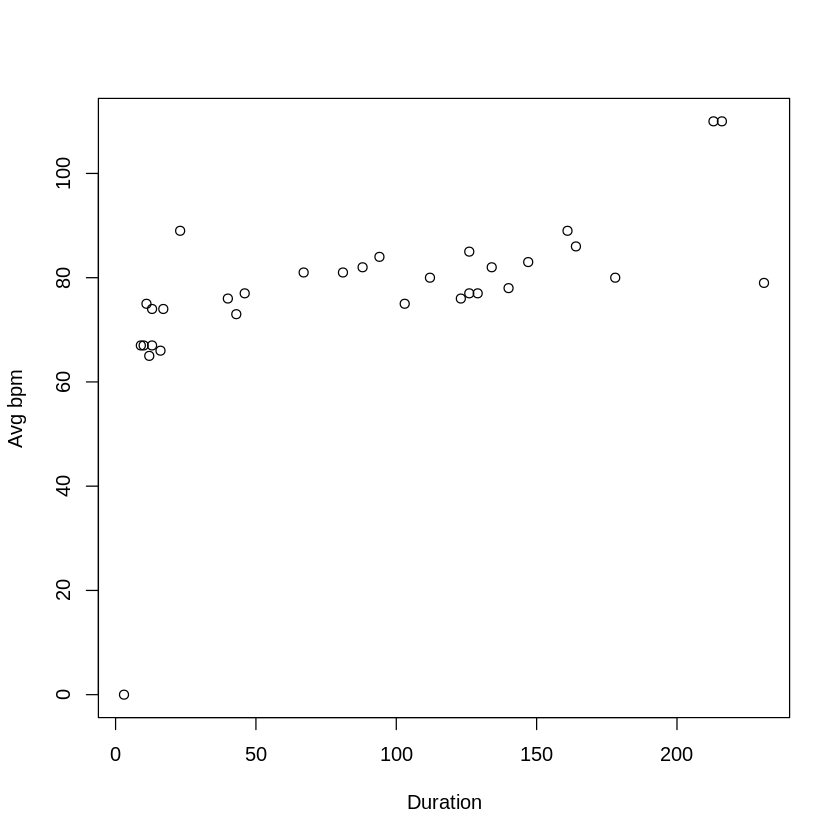

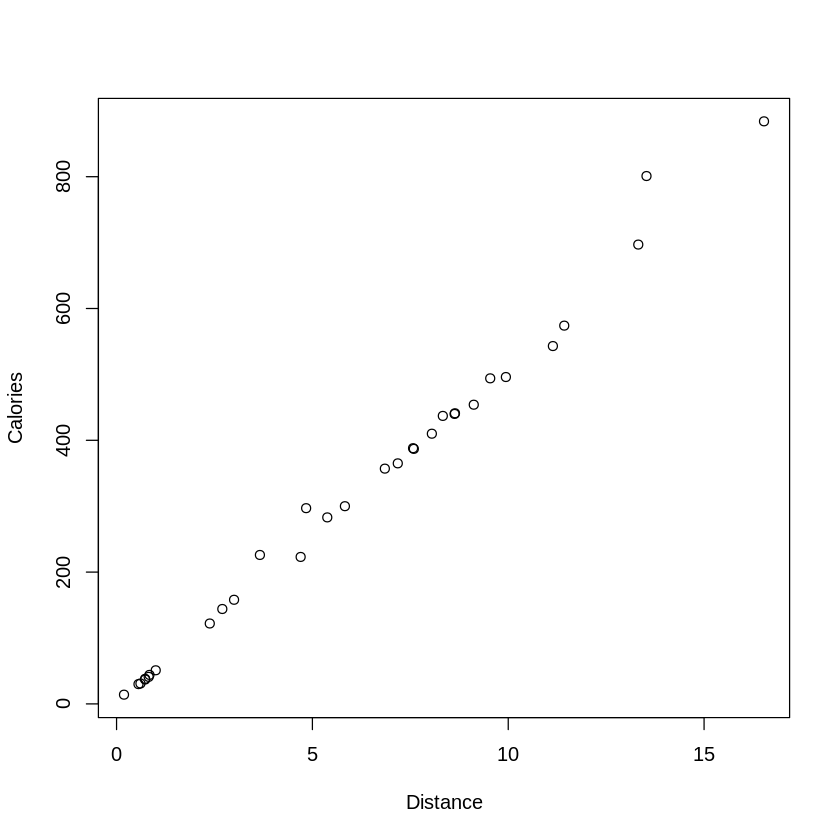

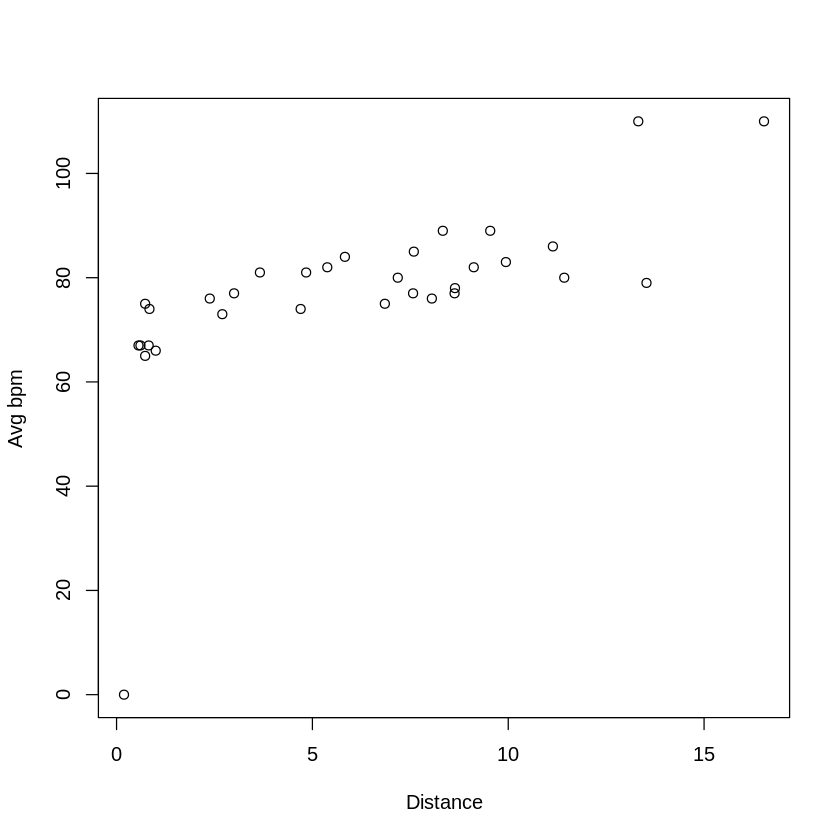

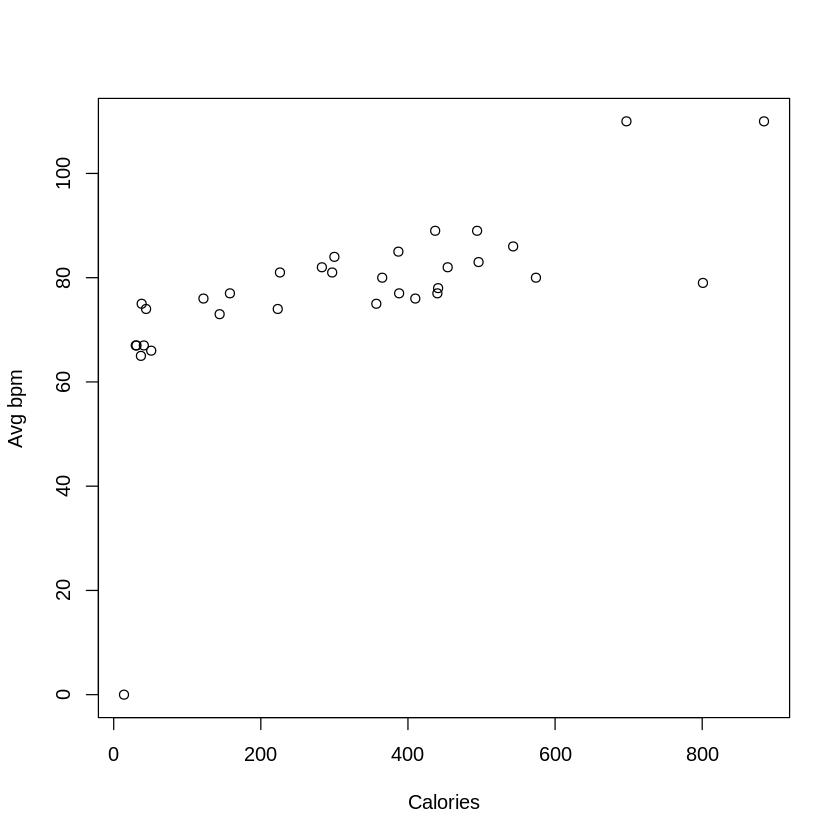

In [196]:


for (i in 1:(size-1)) {
  for (j in (i + 1):size) {
    plot(sub_data[[sub_features[i]]], sub_data[[sub_features[j]]], xlab = sub_features[i], ylab = sub_features[j])
  }
}


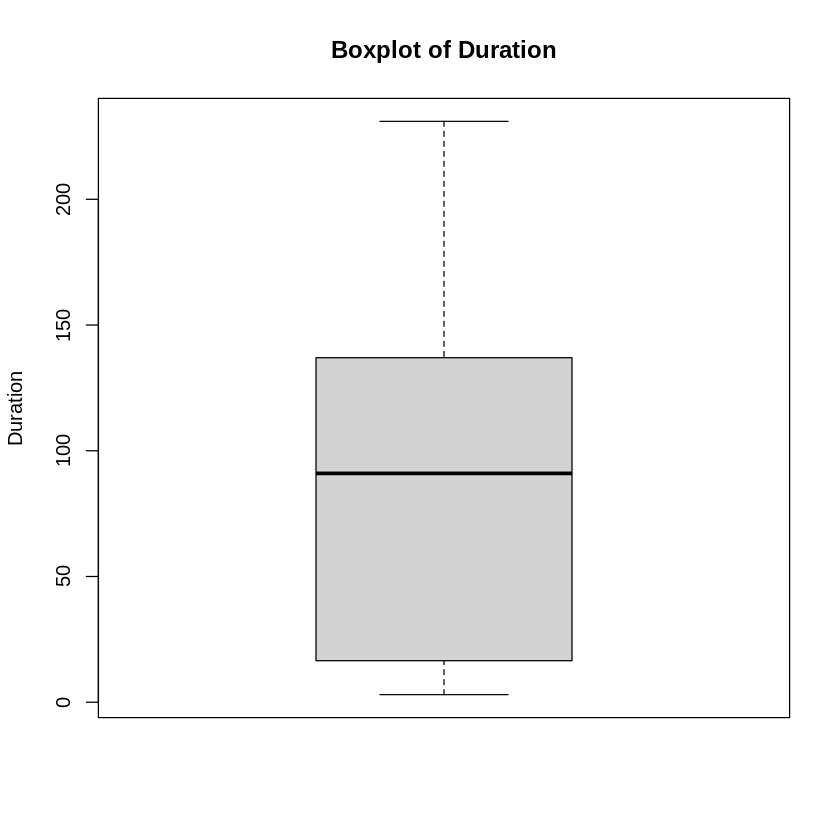

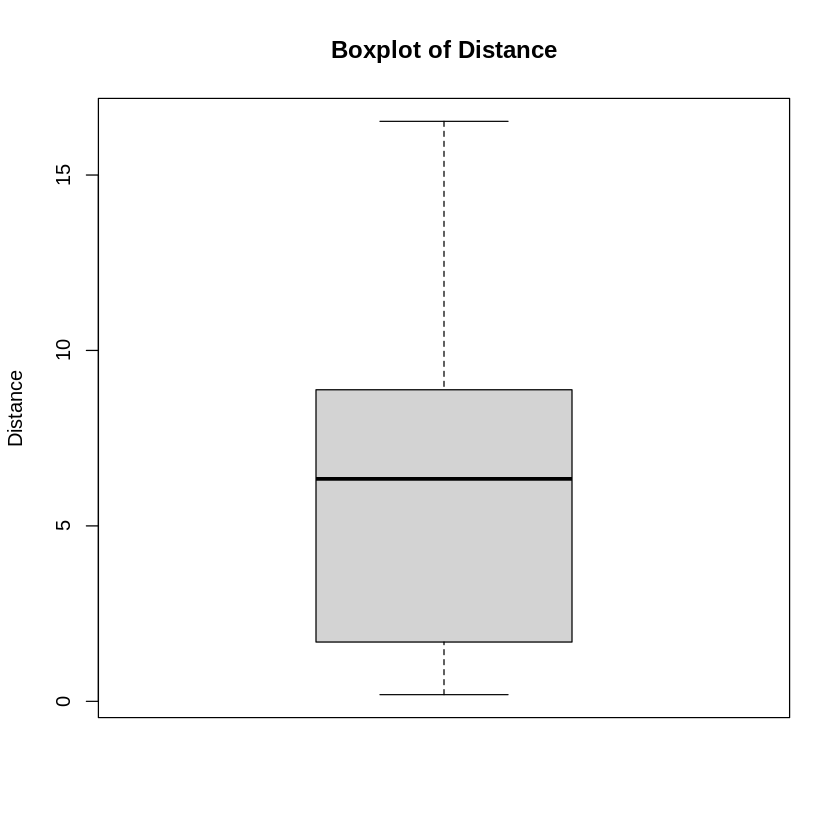

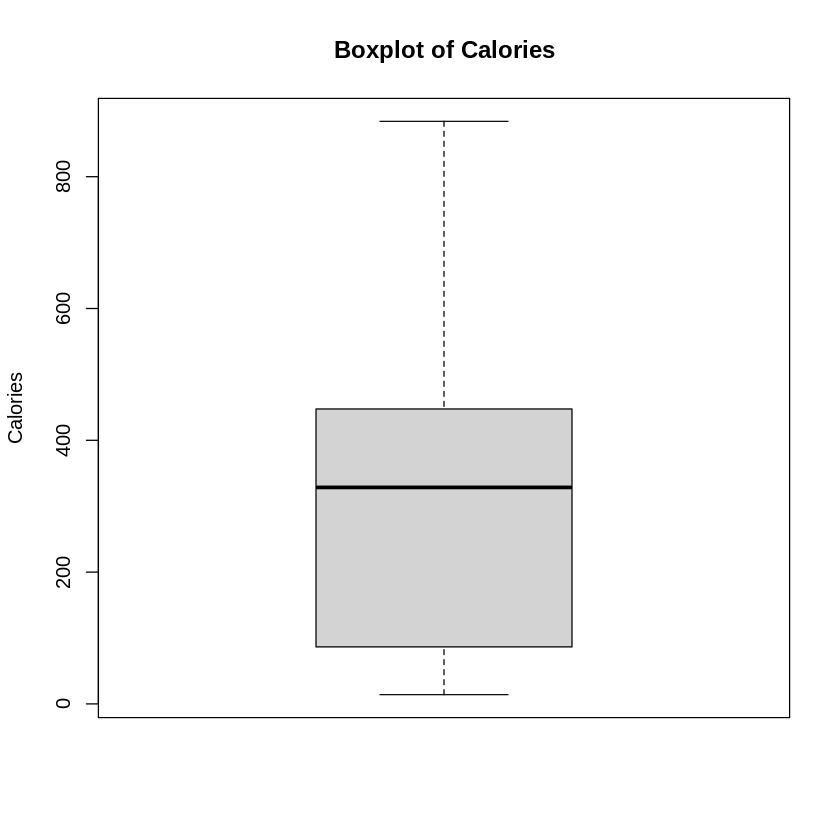

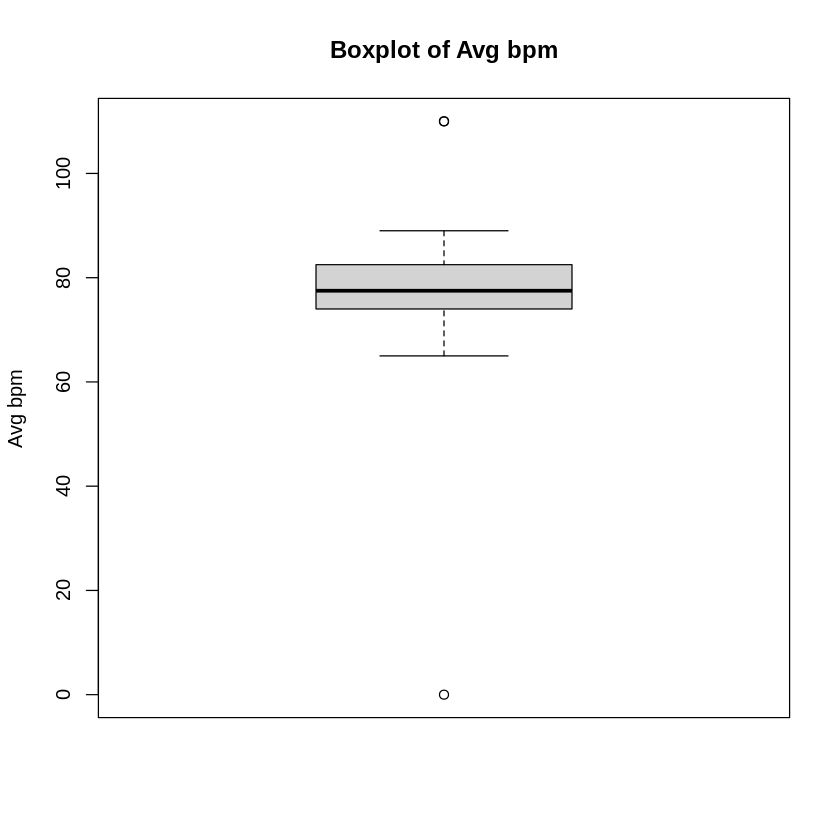

In [201]:
for (i in 1: size){
  boxplot(sub_data[[sub_features[i]]], main = paste("Boxplot of", sub_features[i]),
            ylab = sub_features[i])
}